# <center>[Fetching Data](https://nextjs.org/learn/dashboard-app/fetching-data)</center>

Now that you've created and seeded your database, let's discuss the different ways you can fetch data for your application, and build out your dashboard overview page.

**In this chapter...**

Here are the topics we’ll cover

1. Learn about some approaches to fetching data: APIs, ORMs, SQL, etc.

2. How Server Components can help you access back-end resources more securely.

3. What network waterfalls are.

4. How to implement parallel data fetching using a JavaScript Pattern.

## Choosing how to fetch data

### API layer

APIs are an intermediary layer between your application code and database. There are a few cases where you might use an API:

- If you're using 3rd party services that provide an API.

- If you're fetching data from the client, you want to have an API layer that runs on the server to avoid exposing your database secrets to the client.

In Next.js, you can create API endpoints using [Route Handlers](https://nextjs.org/docs/app/building-your-application/routing/route-handlers).

### Database queries

When you're creating a full-stack application, you'll also need to write logic to interact with your database. For [relational databases](https://aws.amazon.com/relational-database/) like Postgres, you can do this with SQL, or an [ORM](https://vercel.com/docs/storage/vercel-postgres/using-an-orm#) like [Prisma](https://www.prisma.io/).

There are a few cases where you have to write database queries:

- When creating your API endpoints, you need to write logic to interact with your database.

- If you are using React Server Components (fetching data on the server), you can skip the API layer, and query your database directly without risking exposing your database secrets to the client.


**<center>It’s time to take a quiz!</center>**

<center>Test your knowledge and see what you’ve just learned.</center>

In which of these scenarios should you not query your database directly?


A. When you're fetching data on the client

B. When you're fetching data on the server

C. When you're creating your own API layer to interact with your database

**A. When you're fetching data on the client**:

That's right, you should not query your database directly when fetching data on the client as this would expose your database secrets.

Let's learn more about React Server Components.

### Using Server Components to fetch data

By default, Next.js applications use **React Server Components**. Fetching data with Server Components is a relatively new approach and there are a few benefits of using them:

- Server Components support promises, providing a simpler solution for asynchronous tasks like data fetching. You can use `async/await` syntax without reaching out for `useEffect`, `useState` or data fetching libraries.

- Server Components execute on the server, so you can keep expensive data fetches and logic on the server and only send the result to the client.

- As mentioned before, since Server Components execute on the server, you can query the database directly without an additional API layer.

**<center>It’s time to take a quiz!</center>**

<center>Test your knowledge and see what you’ve just learned.</center>

What's one advantage of using React Server Components to fetch data?


**A**: They automatically protect you from SQL injection.

**B**: They allow you to query the database directly from the server without an additional API layer.

**C**: They require you to use an API layer and create endpoints.

Server components allow you fetch data directly from your database.

Answer: **B**

### Using SQL

For your dashboard project, you'll write database queries using the [Vercel Postgres SDK](https://vercel.com/docs/storage/vercel-postgres/sdk) and SQL. There are a few reasons why we'll be using SQL:

- SQL is the industry standard for querying relational databases (e.g. ORMs generate SQL under the hood).

- Having a basic understanding of SQL can help you understand the fundamentals of relational databases, allowing you to apply your knowledge to other tools.

- SQL is versatile, allowing you to fetch and manipulate specific data.

- The Vercel Postgres SDK provides protection against [SQL injections](https://vercel.com/docs/storage/vercel-postgres/sdk#preventing-sql-injections).

Don't worry if you haven't used SQL before - we have provided the queries for you.

Go to `/app/lib/data.ts`, here you'll see that we're importing the [sql](https://vercel.com/docs/storage/vercel-postgres/sdk#sql) function from `@vercel/postgres`. This function allows you to query your database:

In [ ]:
// /app/lib/data.ts

import { sql } from '@vercel/postgres';
 
// ...

You can call `sql` inside any Server Component. But to allow you to navigate the components more easily, we've kept all the data queries in the `data.ts` file, and you can import them into the components.

**<center>It’s time to take a quiz!</center>**

<center>Test your knowledge and see what you’ve just learned.</center>

What does SQL allow you to do in terms of fetching data?


**A**: Fetch all your data indiscriminately

**B**: Fetch and manipulate specific data

**C**: Automatically cache data for better performance

**D**: Change the database schema on the fly

SQL allows you to write targeted queries to fetch and manipulate specific data.

Answer: **B**

**Note**: If you used your own database provider in Chapter 6, you'll need to update the database queries to work with your provider. You can find the queries in `/app/lib/data.ts`.

## Fetching data for the dashboard overview page

Now that you understand different ways of fetching data, let's fetch data for the dashboard overview page. Navigate to `/app/dashboard/page.tsx`, paste the following code, and spend some time exploring it:

In [ ]:
// /app/dashboard/page.tsx

import { Card } from '@/app/ui/dashboard/cards';
import RevenueChart from '@/app/ui/dashboard/revenue-chart';
import LatestInvoices from '@/app/ui/dashboard/latest-invoices';
import { lusitana } from '@/app/ui/fonts';
 
export default async function Page() {
  return (
    <main>
      <h1 className={`${lusitana.className} mb-4 text-xl md:text-2xl`}>
        Dashboard
      </h1>
      <div className="grid gap-6 sm:grid-cols-2 lg:grid-cols-4">
        {/* <Card title="Collected" value={totalPaidInvoices} type="collected" /> */}
        {/* <Card title="Pending" value={totalPendingInvoices} type="pending" /> */}
        {/* <Card title="Total Invoices" value={numberOfInvoices} type="invoices" /> */}
        {/* <Card
          title="Total Customers"
          value={numberOfCustomers}
          type="customers"
        /> */}
      </div>
      <div className="mt-6 grid grid-cols-1 gap-6 md:grid-cols-4 lg:grid-cols-8">
        {/* <RevenueChart revenue={revenue}  /> */}
        {/* <LatestInvoices latestInvoices={latestInvoices} /> */}
      </div>
    </main>
  );
}

In the code above:

Page is an **async** component. This allows you to use `await` to fetch data.
There are also 3 components which receive data: `<Card>`, `<RevenueChart>`, and `<LatestInvoices>`. They are currently commented out to prevent the application from erroring.

## Fetching data for `<RevenueChart/>`

To fetch data for the `<RevenueChart/>` component, import the `fetchRevenue` function from `data.ts` and call it inside your component:

In [ ]:
// /app/dashboard/page.tsx

import { Card } from '@/app/ui/dashboard/cards';
import RevenueChart from '@/app/ui/dashboard/revenue-chart';
import LatestInvoices from '@/app/ui/dashboard/latest-invoices';
import { lusitana } from '@/app/ui/fonts';
import { fetchRevenue } from '@/app/lib/data';
 
export default async function Page() {
  const revenue = await fetchRevenue();
  // ...
}

Then, uncomment the `<RevenueChart/>` component, navigate to the component file (`/app/ui/dashboard/revenue-chart.tsx`) and uncomment the code inside it. Check your localhost, you should be able to see a chart that uses `revenue` data.

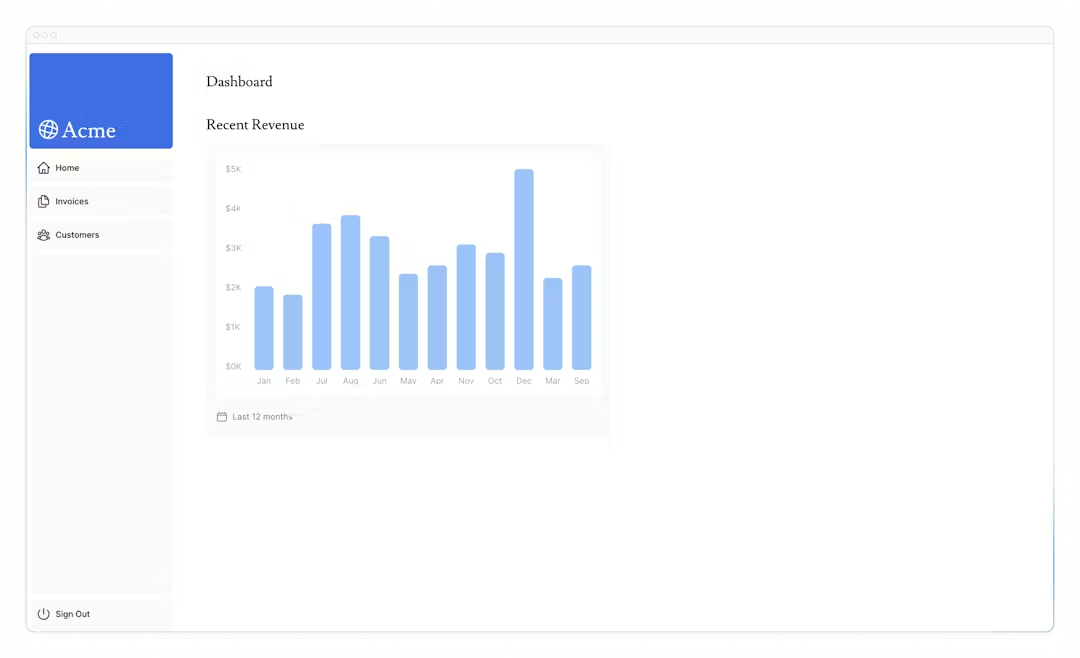

Let's continue importing some more data queries!

## Fetching data for `<LatestInvoices/>`

For the `<LatestInvoices />` component, we need to get the latest 5 invoices, sorted by date.

You could fetch all the invoices and sort through them using JavaScript. This isn't a problem as our data is small, but as your application grows, it can significantly increase the amount of data transferred on each request and the JavaScript required to sort through it.

Instead of sorting through the latest invoices in-memory, you can use an SQL query to fetch only the last 5 invoices. For example, this is the SQL query from your `data.ts` file:

In [ ]:
// /app/lib/data.ts

// Fetch the last 5 invoices, sorted by date
const data = await sql<LatestInvoiceRaw>`
  SELECT invoices.amount, customers.name, customers.image_url, customers.email
  FROM invoices
  JOIN customers ON invoices.customer_id = customers.id
  ORDER BY invoices.date DESC
  LIMIT 5`;

In your page, import the `fetchLatestInvoices` function:

In [ ]:
// /app/dashboard/page.tsx

import { Card } from '@/app/ui/dashboard/cards';
import RevenueChart from '@/app/ui/dashboard/revenue-chart';
import LatestInvoices from '@/app/ui/dashboard/latest-invoices';
import { lusitana } from '@/app/ui/fonts';
import { fetchRevenue, fetchLatestInvoices } from '@/app/lib/data';
 
export default async function Page() {
  const revenue = await fetchRevenue();
  const latestInvoices = await fetchLatestInvoices();
  // ...
}

Then, uncomment the `<LatestInvoices />` component. You will also need to uncomment the relevant code in the `<LatestInvoices />` component itself, located at `/app/ui/dashboard/latest-invoices`.

If you visit your localhost, you should see that only the last 5 are returned from the database. Hopefully, you're beginning to see the advantages of querying your database directly!

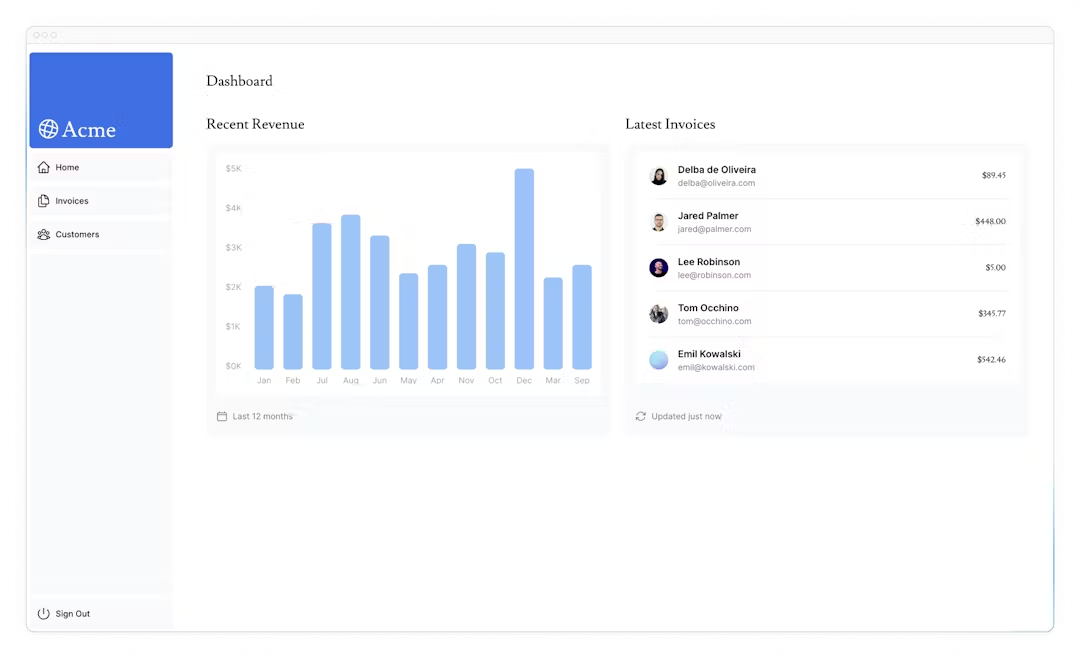

## Practice: Fetch data for the `<Card>` components

Now it's your turn to fetch data for the `<Card>` components. The cards will display the following data:

- Total amount of invoices collected.

- Total amount of invoices pending.

- Total number of invoices.

- Total number of customers.

Again, you might be tempted to fetch all the invoices and customers, and use JavaScript to manipulate the data. For example, you could use `Array.length` to get the total number of invoices and customers:

In [ ]:
const totalInvoices = allInvoices.length;
const totalCustomers = allCustomers.length;

But with SQL, you can fetch only the data you need. It's a little longer than using `Array.length`, but it means less data needs to be transferred during the request. This is the SQL alternative:

In [ ]:
const invoiceCountPromise = sql`SELECT COUNT(*) FROM invoices`;
const customerCountPromise = sql`SELECT COUNT(*) FROM customers`;

The function you will need to import is called `fetchCardData`. You will need to destructure the values returned from the function.

**Hint**:

- Check the card components to see what data they need.

- Check the `data.ts` file to see what the function returns.

In [ ]:
// /app/dashboard/page.tsx

import { Card } from '@/app/ui/dashboard/cards';
import RevenueChart from '@/app/ui/dashboard/revenue-chart';
import LatestInvoices from '@/app/ui/dashboard/latest-invoices';
import { lusitana } from '@/app/ui/fonts';
import {
  fetchRevenue,
  fetchLatestInvoices,
  fetchCardData,
} from '@/app/lib/data';
 
export default async function Page() {
  const revenue = await fetchRevenue();
  const latestInvoices = await fetchLatestInvoices();
  const {
    numberOfInvoices,
    numberOfCustomers,
    totalPaidInvoices,
    totalPendingInvoices,
  } = await fetchCardData();
 
  return (
    <main>
      <h1 className={`${lusitana.className} mb-4 text-xl md:text-2xl`}>
        Dashboard
      </h1>
      <div className="grid gap-6 sm:grid-cols-2 lg:grid-cols-4">
        <Card title="Collected" value={totalPaidInvoices} type="collected" />
        <Card title="Pending" value={totalPendingInvoices} type="pending" />
        <Card title="Total Invoices" value={numberOfInvoices} type="invoices" />
        <Card
          title="Total Customers"
          value={numberOfCustomers}
          type="customers"
        />
      </div>
      <div className="mt-6 grid grid-cols-1 gap-6 md:grid-cols-4 lg:grid-cols-8">
        <RevenueChart revenue={revenue} />
        <LatestInvoices latestInvoices={latestInvoices} />
      </div>
    </main>
  );
}

Great! You've now fetched all the data for the dashboard overview page. Your page should look like this:

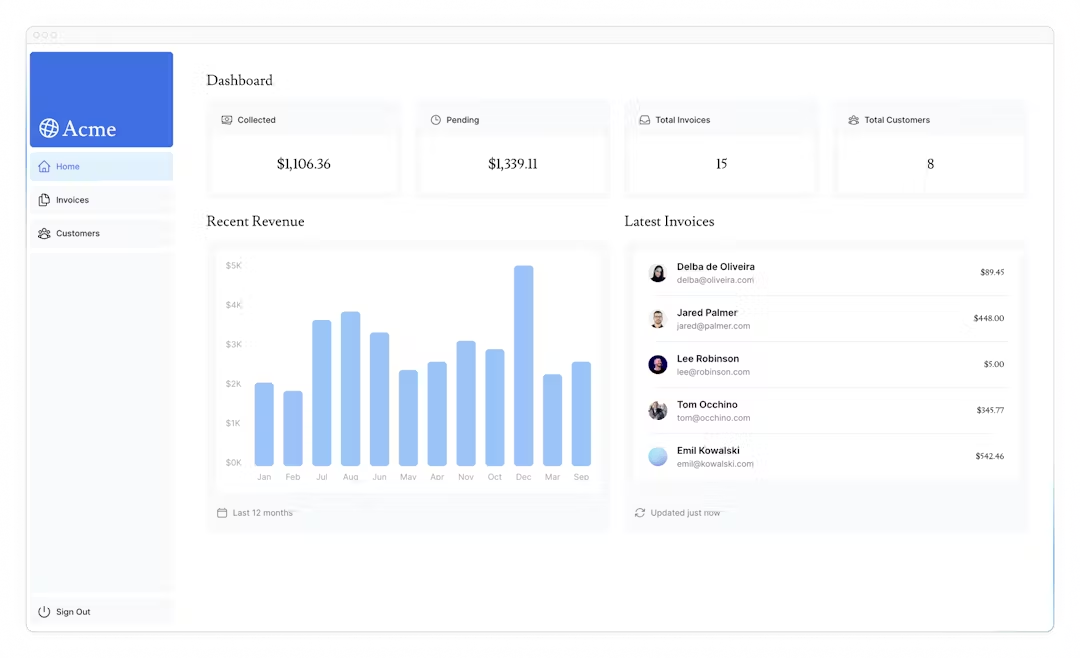

However... there are two things you need to be aware of:

1. The data requests are unintentionally blocking each other, creating a **request waterfall**.

2. By default, Next.js **prerenders** routes to improve performance, this is called **Static Rendering**. So if your data changes, it won't be reflected in your dashboard.

Let's discuss number 1 in this chapter, then look into detail at number 2 in the next chapter.

## What are request waterfalls?

A "waterfall" refers to a sequence of network requests that depend on the completion of previous requests. In the case of data fetching, each request can only begin once the previous request has returned data.

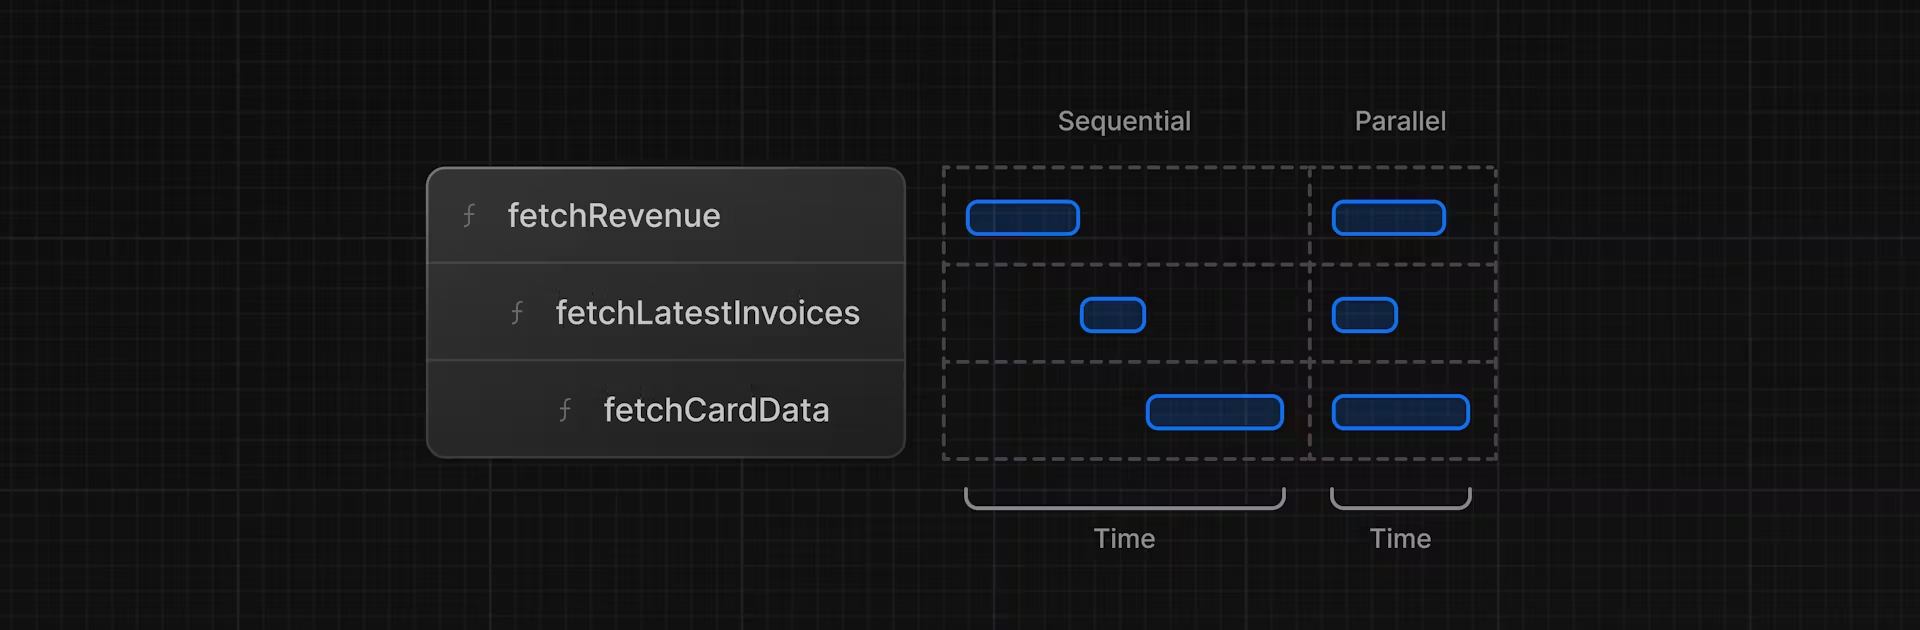

For example, we need to wait for `fetchRevenue()` to execute before `fetchLatestInvoices()` can start running, and so on.

In [ ]:
// /app/dashboard/page.tsx

const revenue = await fetchRevenue();
const latestInvoices = await fetchLatestInvoices(); // wait for fetchRevenue() to finish
const {
  numberOfInvoices,
  numberOfCustomers,
  totalPaidInvoices,
  totalPendingInvoices,
} = await fetchCardData(); // wait for fetchLatestInvoices() to finish

This pattern is not necessarily bad. There may be cases where you want waterfalls because you want a condition to be satisfied before you make the next request. For example, you might want to fetch a user's ID and profile information first. Once you have the ID, you might then proceed to fetch their list of friends. In this case, each request is contingent on the data returned from the previous request.

However, this behavior can also be unintentional and impact performance.

**<center>It’s time to take a quiz!</center>**

<center>Test your knowledge and see what you’ve just learned.</center>

When might you want to use a waterfall pattern?


**A**: To satisfy a condition before making the next request

**B**: To make all requests simultaneously

**C**: To reduce the server load by doing one fetch at a time

For example, you might want to fetch a user's ID and profile information first. Once you have the ID, you might then proceed to fetch their list of friends.

Answer: **A**

## Parallel data fetching

A common way to avoid waterfalls is to initiate all data requests at the same time - in parallel.

In JavaScript, you can use the [Promise.all()](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/Promise/all) or [Promise.allSettled()](https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/Promise/allSettled) functions to initiate all promises at the same time. For example, in `data.ts`, we're using `Promise.all()` in the `fetchCardData()` function:

In [ ]:
// /app/lib/data.js

export async function fetchCardData() {
    try {
      const invoiceCountPromise = sql`SELECT COUNT(*) FROM invoices`;
      const customerCountPromise = sql`SELECT COUNT(*) FROM customers`;
      const invoiceStatusPromise = sql`SELECT
           SUM(CASE WHEN status = 'paid' THEN amount ELSE 0 END) AS "paid",
           SUM(CASE WHEN status = 'pending' THEN amount ELSE 0 END) AS "pending"
           FROM invoices`;
   
      const data = await Promise.all([
        invoiceCountPromise,
        customerCountPromise,
        invoiceStatusPromise,
      ]);
      // ...
    }
  }

By using this pattern, you can:

- Start executing all data fetches at the same time, which can lead to performance gains.

- Use a native JavaScript pattern that can be applied to any library or framework.

However, there is one **disadvantage** of relying only on this JavaScript pattern: what happens if one data request is slower than all the others?

## <center>You've Completed Chapter 6</center>

<center>With your database now set up and integrated, you can continue building your application.</center>

<center>
Next Up

**8: Static and Dynamic Rendering**

Learn about how you can use to further optimize data fetching with PPR and Streaming.

[<button>Start Chapter 8</button>](08_Static_and_Dynamic_Rendering.ipynb)
</center>